In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sc
import numpy as np
#smth

In [5]:
data = pd.read_csv(r"C:\Users\Ishaan\Desktop\DataSet\Data.csv")
pop_data = pd.read_csv(r"C:\Users\Ishaan\Desktop\DataSet\State_data.csv")
ncap=pd.read_csv(r"C:\Users\Ishaan\Desktop\DataSet\NCAP_Funding.csv")

# data = pd.read_csv(r"C:\Users\phataks\Downloads\drive-download-20250213T140207Z-001\Data.csv")
# pop_data = pd.read_csv(r"C:\Users\phataks\Downloads\drive-download-20250213T140207Z-001\State_data.csv")
# ncap=pd.read_csv(r"C:\Users\phataks\Downloads\drive-download-20250213T140207Z-001\NCAP_Funding.csv")

szn_grp = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Summer', 4: 'Summer', 5: 'Summer',
    6: 'Monsoon', 7: 'Monsoon', 8: 'Monsoon', 9: 'Monsoon',
    # 10: 'other', 11: 'other'
}

month_grp = {
     1: 'January', 2: 'February',
    3: 'March', 4: 'April', 5: 'May',
    6: 'June', 7: 'July', 8: 'August', 9: 'September',
    10: 'October', 11: 'November',12: 'December'
}

day_grp={
    0: "Week Day",2: "Week Day",3: "Week Day",4: "Week Day",1 : "Week Day",
    5: "Weekend" , 6: "Weekend"
    #0-mon 6-sun
}

data['Timestamp']=pd.to_datetime(data['Timestamp'])
data['seasons'] = data['Timestamp'].dt.month.map(szn_grp)
data['weekday'] = data['Timestamp'].dt.day_of_week.map(day_grp)
data['month'] = data['Timestamp'].dt.month.map(month_grp)
data['year'] = data['Timestamp'].dt.year

states=np.sort(data["state"].unique().astype(str))
stations=np.sort(data["station"].unique().astype(str))
Date=pd.to_datetime(data["Timestamp"])

pop_data.eval("density = Population / `Area (km2)` ", inplace=True)

data_copy = data #copy of the data for later use if required
print(pop_data)  
data

                State  Population  Area (km2)       density
0       Uttar Pradesh   199812341      240928    829.344622
1         Maharashtra   112374333      307713    365.192023
2               Bihar   104099452       94163   1105.523953
3         West Bengal    91276115       88752   1028.440091
4      Madhya Pradesh    72626809      308252    235.608557
5          Tamil Nadu    72147030      130058    554.729659
6           Rajasthan    68548437      342239    200.294055
7           Karnataka    61095297      191791    318.551428
8             Gujarat    60439692      196024    308.328021
9      Andhra Pradesh    49577103      162975    304.200663
10             Odisha    41974219      155707    269.571818
11          Telangana    35003674      112077    312.318085
12             Kerala    33406061       38863    859.585235
13          Jharkhand    32988134       79716    413.820739
14              Assam    31205576       78438    397.837477
15             Punjab    27743338       

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,seasons,weekday,month,year
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh,Winter,Weekend,January,2017
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh,Winter,Weekend,January,2017
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan,Winter,Weekend,January,2017
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra,Winter,Weekend,January,2017
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,Weekend,January,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra,Winter,Week Day,December,2024
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh,Winter,Week Day,December,2024
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh,Winter,Week Day,December,2024
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim,Winter,Week Day,December,2024


# **Spatial Aggregation**

In [6]:
maxIdx=data.groupby("state")["PM2.5"].mean().argmax()
str(states[maxIdx])

'Delhi'

In [7]:
mask=Date.dt.year==2023
mask2=data[mask]["PM2.5"]>300


pmStates=np.sort(data[mask][mask2]["state"].unique().astype(str))
maxIdx=data[mask&mask2].groupby("state")["PM2.5"].count().argmax()
str(pmStates[maxIdx])

'Delhi'

In [8]:
maxIdx=data.groupby("state")["PM2.5"].std().argmax()
str(states[maxIdx])

'Delhi'

In [33]:
mask=np.array(Date.dt.year==2021 )|np.array(Date.dt.year==2020)
minArg=data[mask].groupby("state")["PM2.5"].mean().argmin()
str(states[minArg])


'Mizoram'

 # **Temporal Agggregation**

In [10]:
mask= np.array(Date.dt.month==8) & np.array(Date.dt.year==2020)
maxArg=data.loc[mask,"PM2.5"].argmax()
data.loc[mask,"station"].iloc[maxArg]

'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'

In [11]:
mask=np.array(Date.dt.year==2018)

lalData=data[mask].query("station=='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB' ")

maxArg=lalData.groupby("seasons")["PM2.5"].mean().argmax()

            
lalData["seasons"].sort_values().unique()[maxArg] #,lalData.loc[:,["seasons","PM2.5"]].query("seasons == 'Summer'")


'Winter'

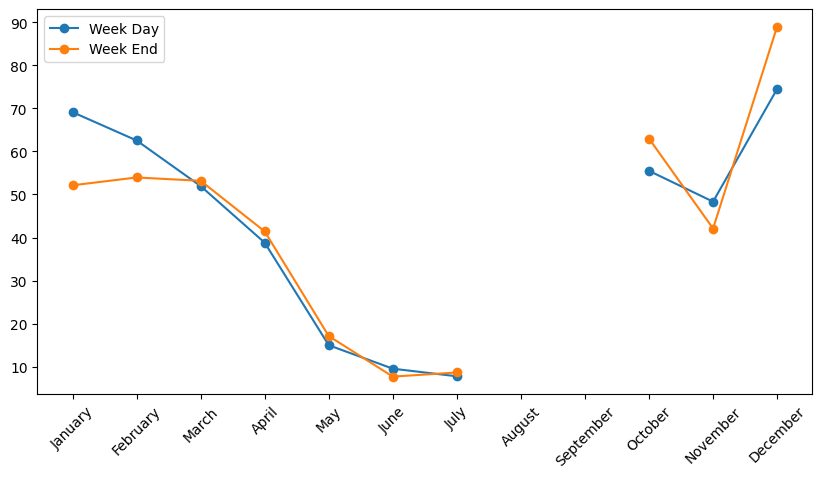

In [34]:
# Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi -KSPCB over the year 2021. Create a plot to show these
# trends 
# Steps:
# Calculate the monthly average PM2.5 for weekdays and weekends separately
# X-axis: Months (January to December).
# Y-axis: Average PM2.5 levels.
# Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.
mask=np.array(Date.dt.year==2021)
lalData=data[mask].query("station=='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'")

weekEndAvg=[]
weekDayAvg=[]
for monthNum  in month_grp:
    monthWeekendMask=(lalData["Timestamp"].dt.month==monthNum) & (lalData["Timestamp"].dt.weekday >= 5)
    monthWeekdayMask = (lalData["Timestamp"].dt.month == monthNum) & (lalData["Timestamp"].dt.weekday < 5)
    
    weekEndAvg.append(lalData["PM2.5"][monthWeekendMask].mean())
    weekDayAvg.append(lalData["PM2.5"][monthWeekdayMask].mean())

plt.figure(figsize=(10, 5))
plt.plot(month_grp.values(),weekDayAvg,label="Week Day" , marker = "o")
plt.plot(month_grp.values(),weekEndAvg,label="Week End" , marker = "o")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# **Spatio-temporal aggregation [3 marks]**

1) For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

2) Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

3) Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)


In [35]:
# Q)1

filtered_data = data[data['Timestamp'].dt.year == 2022]
grouped = filtered_data.groupby(['seasons', 'state'])['PM2.5'].mean()
perChange = ( grouped['Monsoon'] - grouped['Summer'] )*100/ grouped['Summer']
print(f"The state with the maximum change is, {perChange.abs().idxmax()} : {perChange.abs().max()}")

The state with the maximum change is, Assam : 61.17641855538734


C:\Users\Ishaan\AppData\Local\Temp\ipykernel_3532\1033022849.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_seas['Year'] = delhi_seas['Timestamp'].dt.year


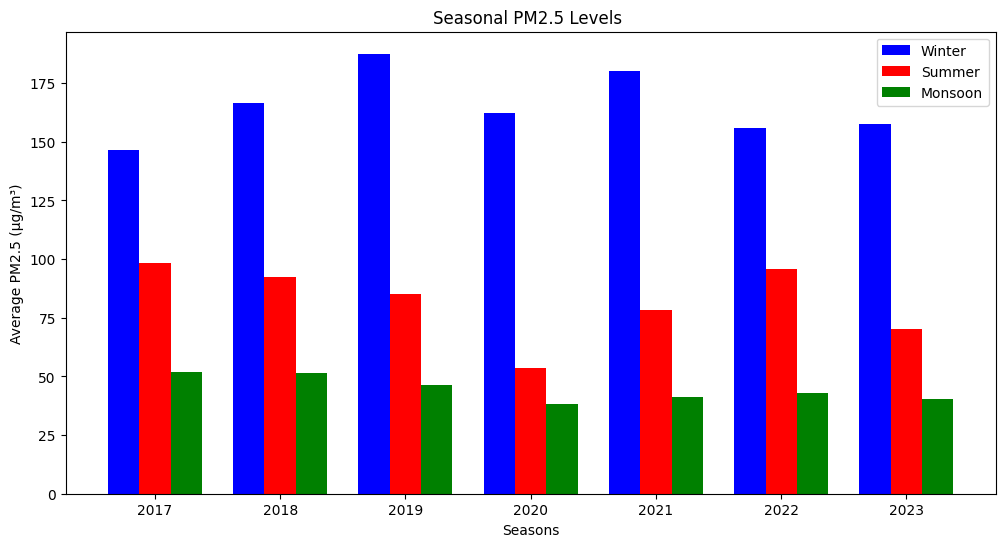

In [14]:
# '''2) Plot the average PM2.5 levels for Delhi across each season (Winter: December-February,
#  Summer: March-May, Monsoon: June-September)
#  from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?'''

delhi_seas = data[data['city'] == 'Delhi']
delhi_seas['Year'] = delhi_seas['Timestamp'].dt.year
delhi_seas.loc[delhi_seas['Timestamp'].dt.month == 12, 'Year'] += 1

delhi_yr = []
for i in range(2017, 2024):
    yearly_data = delhi_seas[delhi_seas['Year'] == i]
    delhi_yr.append(yearly_data)

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.25


for i,dat in enumerate(delhi_yr):
    if not i:
        ax.bar(i+2017 - bar_width,dat.query("seasons == 'Winter'")["PM2.5"].mean(), width=bar_width,label="Winter", color='blue')
        ax.bar(i+2017 ,dat.query("seasons == 'Summer'")["PM2.5"].mean(), width=bar_width, label="Summer", color='red')
        ax.bar(i+2017 + bar_width,dat.query("seasons == 'Monsoon'")["PM2.5"].mean(), width=bar_width,label="Monsoon", color='Green')
    ax.bar(i+2017 - bar_width,dat.query("seasons == 'Winter'")["PM2.5"].mean(), width=bar_width, color='blue')
    ax.bar(i+2017 ,dat.query("seasons == 'Summer'")["PM2.5"].mean(), width=bar_width,  color='red')
    ax.bar(i+2017 + bar_width,dat.query("seasons == 'Monsoon'")["PM2.5"].mean(), width=bar_width, color='Green')


plt.title("Seasonal PM2.5 Levels ")
plt.xticks(np.arange(2017,2024))
plt.xlabel("Seasons")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.legend()
plt.show()




It can clearly be seen that across the years 2017 to 2022 that there is higher amount of pollution in winter, followed by summer and least amount of pollution in monsoon.

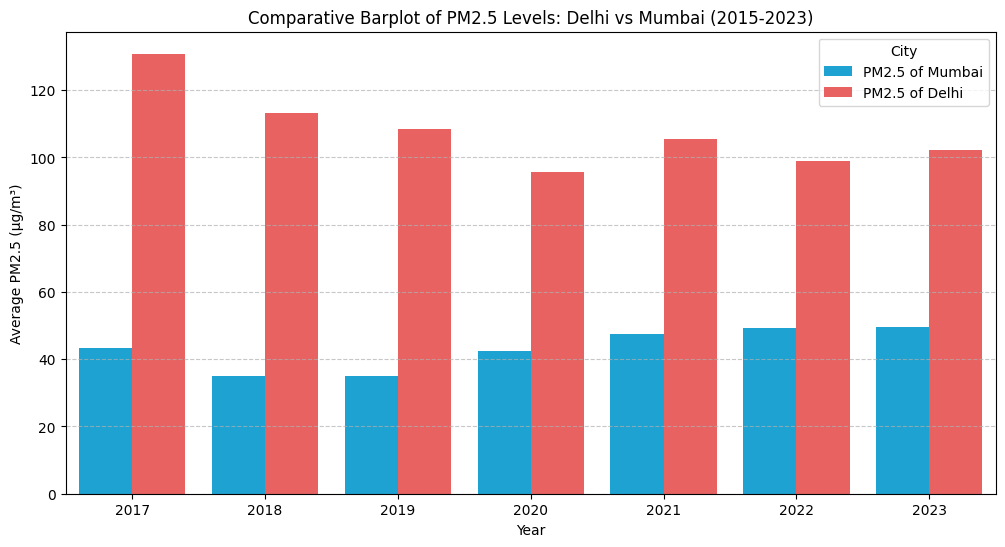

Mumbai's PM2.5 fluctuation (standard deviation): 40.18
Delhi's PM2.5 fluctuation (standard deviation): 84.93
Delhi had more fluctuations in PM2.5 levels.


In [15]:
'''3) Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023.
 Which city had more fluctuations? (Hint: Think what fluctuation means)'''
mumbai_data = data[data['city'] == 'Mumbai']
delhi_data = data[data['city'] == 'Delhi']
mum_yr = []
del_yr = []
for i in range(2015, 2024):
  mum_yr.append(mumbai_data[ mumbai_data['Timestamp'].dt.year == i ])
  del_yr.append(delhi_data[ delhi_data['Timestamp'].dt.year == i ])

mumbai_combined = pd.concat(mum_yr)
delhi_combined = pd.concat(del_yr)

mumbai_combined['Year'] = mumbai_combined['Timestamp'].dt.year
delhi_combined['Year'] = delhi_combined['Timestamp'].dt.year

mumbai_avg = mumbai_combined.groupby('Year')['PM2.5'].mean().reset_index()
delhi_avg = delhi_combined.groupby('Year')['PM2.5'].mean().reset_index()

comparison = pd.merge(mumbai_avg, delhi_avg, on='Year', suffixes=(' of Mumbai', ' of Delhi'))

plt.figure(figsize=(12, 6))
comparison_melted = comparison.melt(id_vars='Year', value_vars=['PM2.5 of Mumbai', 'PM2.5 of Delhi'],
                                    var_name='City', value_name='PM2.5')

sns.barplot(data=comparison_melted, x='Year', y='PM2.5', hue='City', palette=['#00B0F0', '#FF4B4B'] )

plt.title('Comparative Barplot of PM2.5 Levels: Delhi vs Mumbai (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.legend(title='City')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

mumbai_std = mumbai_combined['PM2.5'].std()
delhi_std = delhi_combined['PM2.5'].std()

print(f"Mumbai's PM2.5 fluctuation (standard deviation): {mumbai_std:.2f}")
print(f"Delhi's PM2.5 fluctuation (standard deviation): {delhi_std:.2f}")

if mumbai_std > delhi_std:
    print("Mumbai had more fluctuations in PM2.5 levels.")
else:
    print("Delhi had more fluctuations in PM2.5 levels.")


In [16]:
mum_yr

[Empty DataFrame
 Columns: [Timestamp, station, PM2.5, PM10, address, city, latitude, longitude, state, seasons, weekday, month, year]
 Index: [],
 Empty DataFrame
 Columns: [Timestamp, station, PM2.5, PM10, address, city, latitude, longitude, state, seasons, weekday, month, year]
 Index: [],
         Timestamp                               station       PM2.5  \
 28     2017-01-01   Bandra Kurla Complex, Mumbai - IITM         NaN   
 29     2017-01-01   Bandra Kurla Complex, Mumbai - MPCB         NaN   
 30     2017-01-01                 Bandra, Mumbai - MPCB  118.202604   
 49     2017-01-01          Borivali East, Mumbai - IITM         NaN   
 50     2017-01-01          Borivali East, Mumbai - MPCB         NaN   
 ...           ...                                   ...         ...   
 204693 2017-12-31  Siddharth Nagar-Worli, Mumbai - IITM         NaN   
 204700 2017-12-31                   Sion, Mumbai - MPCB         NaN   
 204740 2017-12-31             Vasai West, Mumbai - MPCB  

# **Population-Based [3 Marks]**

1)Which state in India has the highest number of monitoring stations relative to its population?

2)Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

3)Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
X-axis: Population density (people per square kilometer).
Y-axis: Average PM2.5 concentration.
Use a scatter plot to show the relationship, where each point represents a state.

In [17]:
pop_data_original = pop_data


In [18]:
'''1)Which state in India has the highest number of monitoring stations relative to its population?'''
a = data.groupby('state')['station']
a = a.nunique()
st_pop = pd.merge(pop_data, a, left_on = 'State', right_on = 'state' )
st_pop['st_per_capita'] = st_pop['station'] / st_pop['Population']
maxIdx = st_pop['st_per_capita'].argmax()
st_pop.iloc[maxIdx]


State             Chandigarh
Population           1055450
Area (km2)               114
density          9258.333333
station                    3
st_per_capita       0.000003
Name: 29, dtype: object

<Axes: xlabel='city', ylabel='poll_per_cap'>

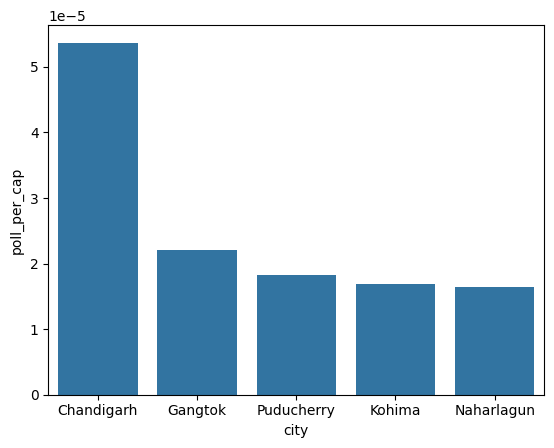

In [19]:
'''2)Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.'''
st_poll = pd.merge(data, pop_data, left_on = 'state', right_on = 'State' )
st_poll["poll_per_cap"] = st_poll['PM2.5'] / st_poll['Population']
st_poll.drop(columns = 'State', axis=1)
a = st_poll.groupby('city')['poll_per_cap'].mean()
a = a.nlargest(5)
sns.barplot(data=a)

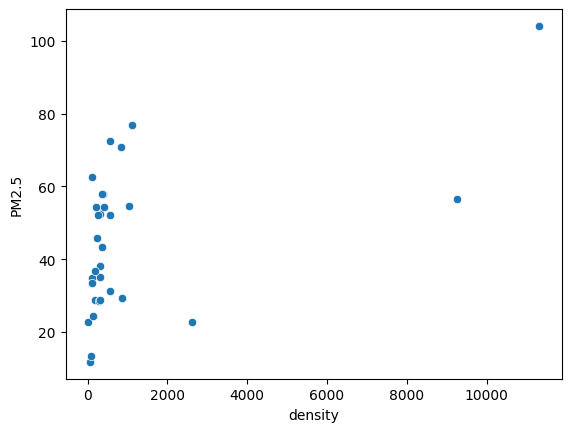

In [36]:
'''Plot the relationship between population density and average PM2.5 concentration for each state.
What conclusion can you draw about the correlation between population density and pollution?
X-axis: Population density (people per square kilometer).
Y-axis: Average PM2.5 concentration.
Use a scatter plot to show the relationship, where each point represents a state.'''

a = st_poll.groupby('state')[["density", "PM2.5"]].mean()
sns.scatterplot(data = a ,x='density', y='PM2.5')
plt.show()

In [21]:
st_poll

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,seasons,weekday,month,year,State,Population,Area (km2),density,poll_per_cap
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh,Winter,Weekend,January,2017,Chhattisgarh,25545198,135192,188.954953,NaN
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh,Winter,Weekend,January,2017,Chhattisgarh,25545198,135192,188.954953,NaN
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan,Winter,Weekend,January,2017,Rajasthan,68548437,342239,200.294055,NaN
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra,Winter,Weekend,January,2017,Maharashtra,112374333,307713,365.192023,NaN
4,2017-01-01,"Alandi, Pune - IITM",NaN,NaN,System Of Air Quality And weather Forecasting ...,Pune,18.675076,73.892743,Maharashtra,Winter,Weekend,January,2017,Maharashtra,112374333,307713,365.192023,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563697,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra,Winter,Week Day,December,2024,Maharashtra,112374333,307713,365.192023,4.868549e-07
1563698,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh,Winter,Week Day,December,2024,Uttar Pradesh,199812341,240928,829.344622,2.664000e-07
1563699,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh,Winter,Week Day,December,2024,Andhra Pradesh,49577103,162975,304.200663,1.512795e-06
1563700,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim,Winter,Week Day,December,2024,Sikkim,610577,7096,86.045237,NaN


# **Area Based [3 Marks]**

Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
X-axis: States.
Y-axis: PM2.5 concentration per square kilometer.
Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.

Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.


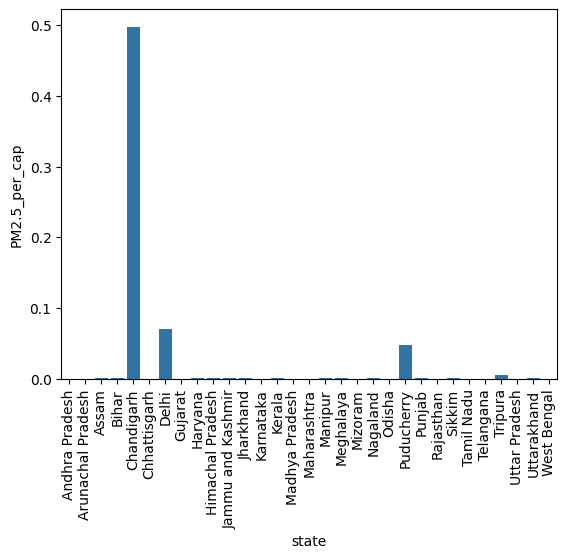

In [22]:
'''
Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
X-axis: States.
Y-axis: PM2.5 concentration per square kilometer.
Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.'''

a = st_poll
a['PM2.5_per_cap'] = st_poll["PM2.5"] / st_poll["Area (km2)"]
a = a.groupby('state')["PM2.5_per_cap"].mean()

sns.barplot(data=a, )
plt.xticks(rotation=90)
plt.show()


In [23]:
'''Compare the total number of monitoring stations per square kilometer in each state.
 Identify the state with the highest density of monitoring stations relative to its area.
 Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.'''

a = st_poll.groupby(['state'])['station'].nunique()
state_data = pd.merge(pop_data, a, left_on='State',right_on= 'state')
state_data['st_per_cap'] = state_data['station'] / state_data["Area (km2)"]
ind = state_data['st_per_cap'].argmax()
state_data.iloc[ind]

State                Delhi
Population        16787941
Area (km2)            1484
density       11312.628706
station                 40
st_per_cap        0.026954
Name: 17, dtype: object

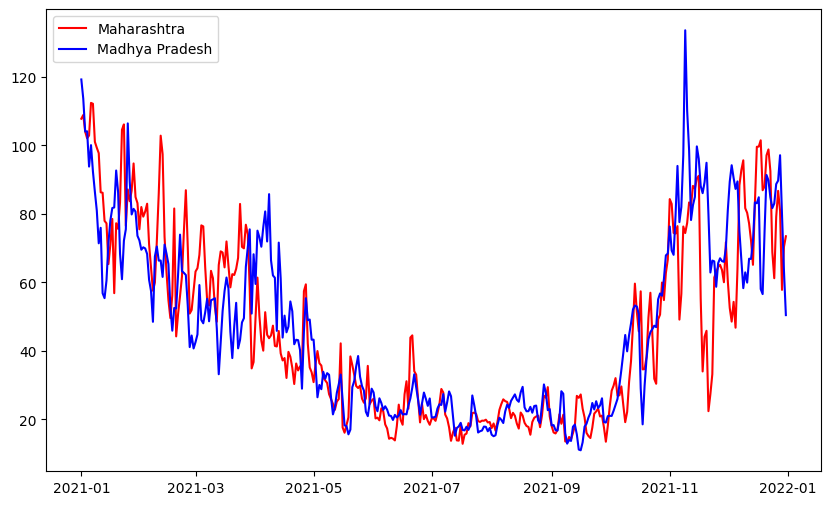

,State,density,PM2.5
0,Maharashtra,365.192023,46.440044
1,Madhya Pradesh,235.608557,47.095952


In [24]:
'''Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021.
 Given that both states have similar area sizes but different population densities,
 analyze how population density impacts pollution levels in these two states.'''

mask=st_poll.Timestamp.dt.year==2021
ExtractedData=st_poll[mask].query("state == 'Maharashtra' | state =='Madhya Pradesh' ")
plt.figure(figsize=(10,6))
plt.plot(ExtractedData.groupby(["state","Timestamp"])["PM2.5"].mean()["Maharashtra"],label="Maharashtra",c="red")
plt.plot(ExtractedData.groupby(["state","Timestamp"])["PM2.5"].mean()["Madhya Pradesh"],label="Madhya Pradesh" ,c="blue")
plt.legend()
# plt.xlim(pd.Timestamp("2021-01-01"), pd.Timestamp("2021-12-31"))
plt.show()
a=pd.merge(pop_data.query("State == 'Maharashtra' | State =='Madhya Pradesh' ")[["State","density"]],ExtractedData.groupby("state")["PM2.5"].mean().rename_axis("State").reset_index())
a


# **Funding Based [3 Marks]**
Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


In [25]:
ncap.replace("-",np.nan,inplace=True)
ncap.rename(columns={"City":"city"},inplace=True)
ncap.iloc[:,3:]=ncap.iloc[:,3:].astype(float)

In [26]:
#Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.
mapping={True:"Funded" , False : "Not Funded"}
ExtractedData=ncap.groupby("State")["Amount released during FY 2021-22"].mean().dropna()

fundedState=ExtractedData.ne(0).rename("Funding Type")
fundedState = fundedState.reset_index()

pm2=data.groupby("state")["PM2.5"].mean().rename("PM2.5")
pm2 = pm2.reset_index().rename(columns={"state": "State"})

pm2=pd.merge(fundedState,pm2,how="outer",on="State")

pm2["Funding Type"]=pm2["Funding Type"].map(mapping)


pm2.groupby("Funding Type")["PM2.5"].mean()



Funding Type
Funded        52.681509
Not Funded    24.513390
Name: PM2.5, dtype: float64

In [27]:
# Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. 
# Has an increment of the financing led to noticeable improvements in air quality?
# combiNCAP=pd.merge(ncap,data.loc[:,["city","PM2.5","year"]],how="inner" , on="city")
# assamData=combiNCAP.query("State == 'Assam' and year>=2019")
assamNcap=ncap.query("State == 'Assam'")


data.query("state== 'Assam'and (year== 2019 or year==2020 ) ").groupby(["city","year"])["PM2.5"].mean().reset_index()
# data.query("state== 'Assam'and (year== 2019 or year==2020 ) ")
# assamNcap

,city,year,PM2.5
0,Byrnihat,2019,NaN
1,Byrnihat,2020,NaN
2,Guwahati,2019,55.752773
3,Guwahati,2020,62.329410
4,Nagaon,2019,NaN
5,Nagaon,2020,NaN
6,Nalbari,2019,NaN
7,Nalbari,2020,NaN
8,Silchar,2019,NaN
9,Silchar,2020,NaN


# **Miscellaneous Questions [5 Marks]**

For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)[1 Mark]

Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?[1.5 Mark]

Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.[1 Mark]

Draw the map of India and plot the sensor locations on the map.[1.5 Mark]

In [28]:
yr_msk = data['Timestamp'].dt.year == 2023
city = data[yr_msk].groupby('city')['PM2.5'].mean()
mx_ct = city.idxmax()
print(mx_ct)
mx_plutd = data[yr_msk]
mx_plutd = mx_plutd[mx_plutd['city']==mx_ct]
days_above = mx_plutd['PM2.5'] > 300
days_above = days_above.sum()
print(days_above)

Darbhanga
3


<Axes: >

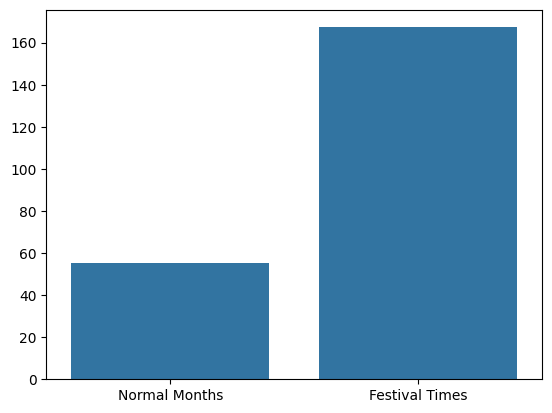

In [29]:
# Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020).
# Do you observe any significant pollution spikes during these festivals?
# If spikes are observed, Can you mark these spikes using arrows?[1.5 Mark]
dl_msk = (data['city'] == 'Delhi') & ((data['seasons']== 'Winter') | ( (data['Timestamp'].dt.day==1) & (data['Timestamp'].dt.month==1) ))
dl_fest = data[dl_msk]
dl_norm = data[~dl_msk]
dl_pl_f = dl_fest['PM2.5'].mean()
dl_pl_nf = dl_norm['PM2.5'].mean()
pl_ser = pd.Series({
    'Normal Months': dl_pl_nf,
    'Festival Times': dl_pl_f
})

sns.barplot(data = pl_ser)


<Axes: >

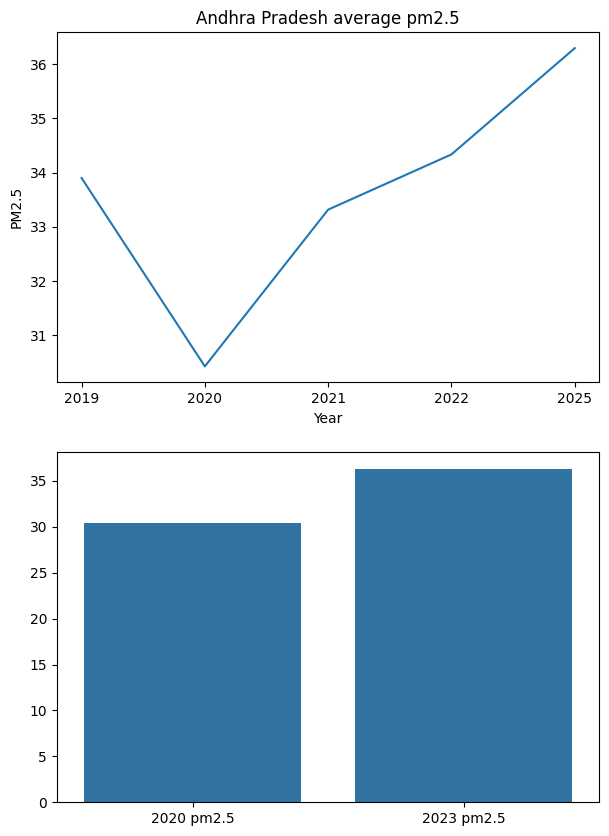

In [30]:
# Identify the state that received the highest NCAP funding in
# 2020 and determine if its air pollution levels improved significantly by 2023.
# Use a line graph to compare yearly average PM2.5 trends.[1 Mark]

st = ncap.groupby('State')['Amount released during FY 2020-21'].sum().idxmax()
_2020 = data[(data['Timestamp'].dt.year==2020) & (data['state']==st)]
_2023 = data[(data['Timestamp'].dt.year==2023) & (data['state']==st)]
_2021 = data[(data['Timestamp'].dt.year==2021) & (data['state']==st)]
_2022 = data[(data['Timestamp'].dt.year==2022) & (data['state']==st)]
_2019 = data[(data['Timestamp'].dt.year==2019) & (data['state']==st)]

fig, axes = plt.subplots(2,1, figsize = (7,10))

axes[0].plot(['2019', '2020', '2021', '2022', '2025'], [_2019['PM2.5'].mean(), _2020['PM2.5'].mean(), _2021['PM2.5'].mean(), _2022['PM2.5'].mean(), _2023['PM2.5'].mean()])
axes[0].set_title('Andhra Pradesh average pm2.5')
axes[0].set_ylabel('PM2.5')
axes[0].set_xlabel('Year')
sns.barplot({'2020 pm2.5': _2020['PM2.5'].mean(), '2023 pm2.5': _2023['PM2.5'].mean()})

In [31]:
import geopandas as gpd
# world = gpd.read_file(r"C:\Users\phataks\Downloads\natural_earth_vector.gpkg\packages\natural_earth_vector.gpkg", layer="ne_110m_admin_0_countries")
world = gpd.read_file(r"C:\Users\Ishaan\Desktop\DataSet\natural_earth_vector.gpkg\packages\natural_earth_vector.gpkg", layer="ne_110m_admin_0_countries")

india = world[world["SOVEREIGNT"] == "India"]

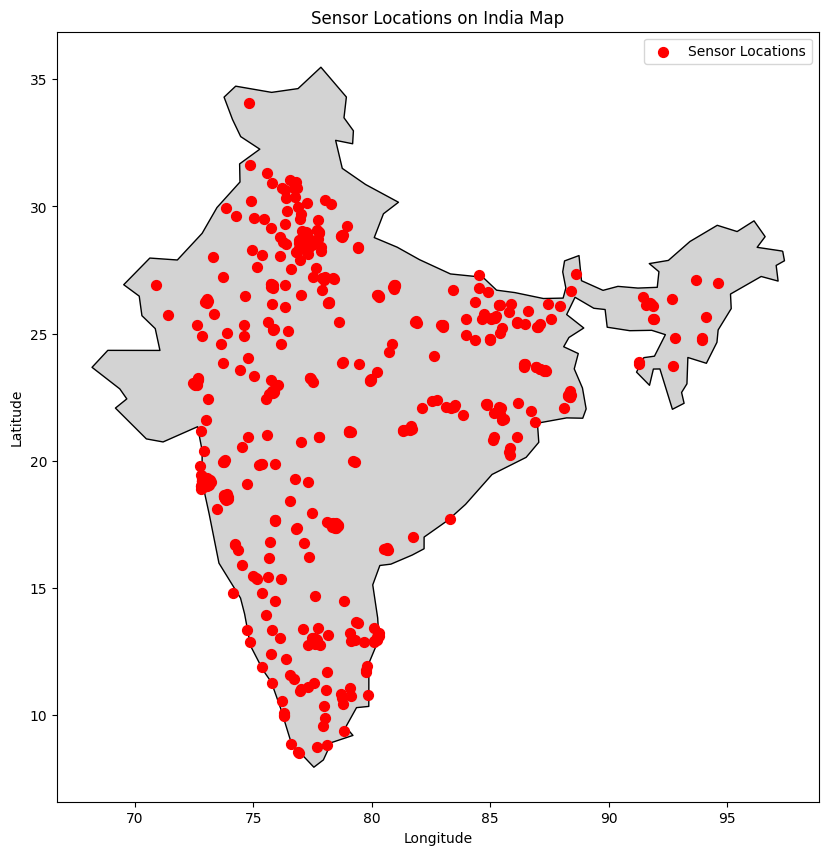

In [32]:
sensor_data = data[['latitude', 'longitude']]
sensor_data = sensor_data.drop_duplicates(subset=['latitude', 'longitude'])

sensor_gdf = gpd.GeoDataFrame(sensor_data, 
                              geometry=gpd.points_from_xy(sensor_data['longitude'], sensor_data['latitude']),
                              crs="EPSG:4326")
fig, ax = plt.subplots(figsize=(10, 10))
india.plot(ax=ax, color="lightgrey", edgecolor="black")

# Plot sensor locations (without text labels)
sensor_gdf.plot(ax=ax, color="red", marker="o", markersize=50, label="Sensor Locations")

plt.title("Sensor Locations on India Map")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()